In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import quad
from optims.CMA_ES import CMA_ES

np.random.seed(42)

In [9]:
class Fun:
  def __init__(self) -> None:
        super().__init__()
        self.n = 0

  def __call__(self, x: np.ndarray) -> float:
      self.n += 1
      return (np.cos(x**2/2) + x/5 + 1).sum()

In [17]:
m_0 = np.random.uniform(0, 5, 1)
m_0

array([4.89192232])

In [48]:
def create_sim(k=3, save_fig=None):
  optim = CMA_ES(np.array([(0, 5)]), m_0, num_generations=10, lambda_=10)
  _best, _xs, _fs = optim.optimize(Fun())

  xs = []
  for mode in optim.modes:
    for _ in range(50):
      xs.append(np.random.multivariate_normal(mode[0], mode[1]))
  xs = np.array(xs).flatten()

  plt.hist(xs, density=True, bins=50, label="CMA histogram")

  sns.kdeplot(xs, label="CMA PDF")

  f = lambda x : np.cos(x**2/2) + x/5 + 1

  integral = quad(lambda x : np.exp(-k*f(x)), 0, 5)[0]
  m_k = lambda x : np.exp(-k*f(x)) / integral

  x = np.linspace(0, 5, 500)
  plt.plot(x, f(x), label="$f$")
  plt.plot(x, m_k(x), label="$m^{(k)}$")

  plt.xlim(0, 5)
  plt.legend()
  plt.title(f"k = {k}")

  if save_fig != None:
    plt.savefig(save_fig, dpi=300, bbox_inches="tight")

  plt.show()

  return optim


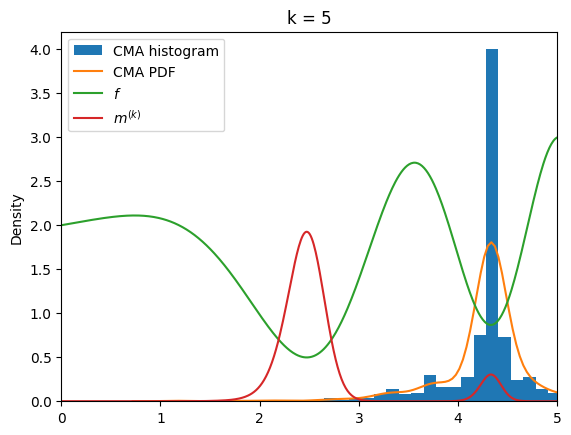

In [49]:
optim = create_sim(k=5)

In [50]:
optim.modes

[(array([4.1523578]), array([[1.19083641]])),
 (array([4.19878792]), array([[0.44915353]])),
 (array([4.15049097]), array([[0.18700372]])),
 (array([4.36759367]), array([[0.09540799]])),
 (array([4.33219841]), array([[0.02562166]])),
 (array([4.34403094]), array([[0.00738879]])),
 (array([4.32854163]), array([[0.00142347]])),
 (array([4.32916975]), array([[0.00033231]])),
 (array([4.33153921]), array([[0.00010014]])),
 (array([4.32618769]), array([[6.48672074e-05]]))]